In [1]:
from dogma import (
    Oligonucleotide,
    GeneticCode,
    calculate_protein_degeneracy,
    calculate_protein_quantile
)
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
supE = GeneticCode(ncbi_id=1,
                   updated_mappings={'TAG': 'Q'})

In [3]:
oligo = Oligonucleotide('NNK'*7, supE)

In [4]:
oligo.sample()

'AGGTGTATGCGGCCGGCGAGG'

In [5]:
oligo.sample('p')

'YSRTKLR'

In [6]:
num_samples = 10_000
samples = oligo.samples(num_samples, 'p')

In [7]:
aa_counts = Counter(''.join(samples))

In [8]:
aa_counts.most_common()

[('S', 6591),
 ('L', 6504),
 ('R', 6426),
 ('P', 4460),
 ('Q', 4402),
 ('A', 4366),
 ('V', 4350),
 ('T', 4310),
 ('G', 4245),
 ('H', 2278),
 ('W', 2268),
 ('D', 2258),
 ('K', 2231),
 ('F', 2222),
 ('Y', 2214),
 ('M', 2196),
 ('N', 2187),
 ('E', 2176),
 ('I', 2170),
 ('C', 2146)]

In [9]:
peptide = oligo.sample('p')
peptide

'MARGRRS'

In [10]:
calculate_protein_degeneracy(peptide, oligo)

Decimal('324')

In [11]:
calculate_protein_quantile(peptide, oligo)

Decimal('0.9978255296875')

In [12]:
calculate_protein_quantile('W'*7, oligo)

Decimal('0.01522435234375')

In [13]:
quantiles = [float(calculate_protein_quantile(_, oligo)) for _ in samples]

In [14]:
s = pd.Series(quantiles)

Text(0.5,1,'Sampling 10000 Proteins from NNK<7>')

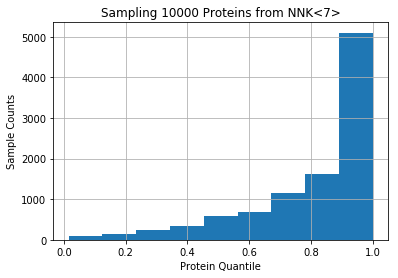

In [15]:
ax = s.hist(bins=9)
ax.set_xlabel('Protein Quantile')
ax.set_ylabel('Sample Counts')
ax.set_title(f'Sampling {num_samples} Proteins from {oligo.compact_label}')

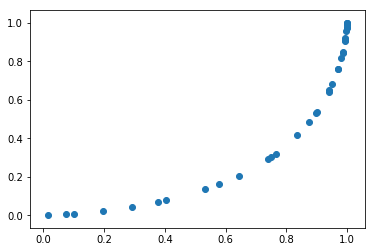

In [16]:
ax = plt.scatter(x=oligo.protein_quantiles, y=oligo.dna_quantiles)

In [17]:
oligos = [Oligonucleotide('NNK'*n, supE) for n in range(1, 13)]

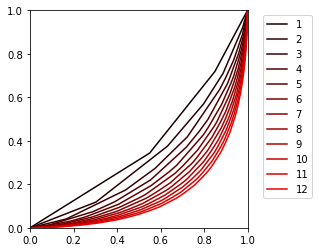

In [81]:
N = 13
fig = plt.figure()
ax = fig.add_subplot(111)
for n in range(1, N):
    oligo = Oligonucleotide('NNK'*n, supE)
    ax.plot([0]+ oligo.protein_quantiles,
             [0]+oligo.dna_quantiles,
             '-',
             color=(n/N, 0, 0),
             label=n)

# formatting figure
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)